In [1]:
#Libraries and Dates
!pip install yfinance
!pip install tfcausalimpact

In [2]:
import yfinance as yf
from causalimpact import CausalImpact
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Dates
training_start = "2020-09-01"
training_end = "2020-10-19"
treatment_start = "2020-10-20"
treatment_end = '2020-10-23'
end_stock = "2020-10-24"

In [4]:
#Loading the data
y = ["BTC-USD"]
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = "1d")
y = y["Adj Close"].rename("y")
y

[*********************100%***********************]  1 of 1 completed


Date
2020-09-01    11970.478516
2020-09-02    11414.034180
2020-09-03    10245.296875
2020-09-04    10511.813477
2020-09-05    10169.567383
2020-09-06    10280.351562
2020-09-07    10369.563477
2020-09-08    10131.516602
2020-09-09    10242.347656
2020-09-10    10363.138672
2020-09-11    10400.915039
2020-09-12    10442.170898
2020-09-13    10323.755859
2020-09-14    10680.837891
2020-09-15    10796.951172
2020-09-16    10974.905273
2020-09-17    10948.990234
2020-09-18    10944.585938
2020-09-19    11094.346680
2020-09-20    10938.271484
2020-09-21    10462.259766
2020-09-22    10538.459961
2020-09-23    10246.186523
2020-09-24    10760.066406
2020-09-25    10692.716797
2020-09-26    10750.723633
2020-09-27    10775.269531
2020-09-28    10709.652344
2020-09-29    10844.640625
2020-09-30    10784.491211
2020-10-01    10619.452148
2020-10-02    10575.974609
2020-10-03    10549.329102
2020-10-04    10669.583008
2020-10-05    10793.339844
2020-10-06    10604.406250
2020-10-07    10668.968

In [5]:
#Load more data
stocks = ["ZAL.DE", "SQ", "CRSP", "TRMB", "JD", "DE", "KTOS", "GOOG"]
X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = "1d")

[*********************100%***********************]  8 of 8 completed


In [6]:
X.head()

Adj Close                                               \
                 CRSP          DE       GOOG         JD       KTOS   
Date                                                                 
2020-09-01  93.419998  210.029663  83.035500  79.267685  19.700001   
2020-09-02  93.930000  209.470062  86.414001  79.959557  19.910000   
2020-09-03  85.690002  203.391754  82.092003  75.952454  19.520000   
2020-09-04  82.019997  203.903107  79.552002  76.874954  19.260000   
2020-09-07        NaN         NaN        NaN        NaN        NaN   

                                                  Close              ...  \
                    SQ       TRMB     ZAL.DE       CRSP          DE  ...   
Date                                                                 ...   
2020-09-01  166.660004  53.410000  77.000000  93.419998  217.690002  ...   
2020-09-02  162.880005  54.310001  77.000000  93.930000  217.110001  ...   
2020-09-03  152.860001  50.900002  75.080002  85.690002  210.809998  ...   
2020-09-04  146.389999  49.959999  71.739998  82.019997  211.339996  ...   
2020-09-07         NaN        NaN  74.000000        NaN         NaN  ...   

                 Open                Volume                         \
                 TRMB     ZAL.DE       CRSP         DE        GOOG   
Date                                                                 
2020-09-01  52.669998  74.959999   779500.0  1873400.0  36506000.0   
2020-09-02  53.779999  77.500000   532000.0  1983000.0  50224000.0   
2020-09-03  54.130001  77.260002  1278900.0  1975200.0  62156000.0   
2020-09-04  51.040001  74.800003  1570300.0  1662300.0  52172000.0   
2020-09-07        NaN  72.239998        NaN        NaN         NaN   

                                                                  
                    JD       KTOS          SQ       TRMB  ZAL.DE  
Date                                                              
2020-09-01  11431400.0   587600.0  12306400.0   542300.0  790198  
2020-09-02  13860900.0   612800.0  11214800.0   728800.0  496554  
2020-09-03  19254000.0   847100.0  16421200.0  1220300.0  736259  
2020-09-04  21500900.0  1060000.0  17995200.0   914700.0  662250  
2020-09-07         NaN        NaN         NaN        NaN  362062  

[5 rows x 48 columns]

In [7]:
X = X.iloc [:,:len(stocks)]

In [8]:
X.columns = X.columns.droplevel()

In [9]:
X.head()

,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,
2020-09-01,93.419998,210.029663,83.035500,79.267685,19.700001,166.660004,53.410000,77.000000
2020-09-02,93.930000,209.470062,86.414001,79.959557,19.910000,162.880005,54.310001,77.000000
2020-09-03,85.690002,203.391754,82.092003,75.952454,19.520000,152.860001,50.900002,75.080002
2020-09-04,82.019997,203.903107,79.552002,76.874954,19.260000,146.389999,49.959999,71.739998
2020-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000000


In [10]:
X.index = X.index.tz_localize(None)
X.index

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28',
               '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-12', '2020-10-13', '2020-10-14',
               '2020-10-15', '2020-10-16', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22', '2020-10-23'],
              dtype='datetime64[ns]', name='Date', freq='B')

In [11]:
#Combine
data = pd.concat([y,X],axis = 1).dropna()
data.head()

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-09-01,11970.478516,93.419998,210.029663,83.035500,79.267685,19.700001,166.660004,53.410000,77.000000
2020-09-02,11414.034180,93.930000,209.470062,86.414001,79.959557,19.910000,162.880005,54.310001,77.000000
2020-09-03,10245.296875,85.690002,203.391754,82.092003,75.952454,19.520000,152.860001,50.900002,75.080002
2020-09-04,10511.813477,82.019997,203.903107,79.552002,76.874954,19.260000,146.389999,49.959999,71.739998
2020-09-08,10131.516602,81.459999,202.841812,76.619499,73.242615,19.230000,139.110001,49.139999,73.440002


In [12]:
#Data Analysis section
data_training = data[data.index <= training_end]
data_training.tail(1)

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-10-19,11742.037109,107.720001,230.57872,76.730499,77.461121,20.639999,186.960007,51.970001,85.0


In [13]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
test = adfuller(x = data_training.y)[1]
if test < 0.05:
  print("The Time Series is stationary")
else:
  print("The Time Series is not stationary")

The Time Series is not stationary


In [14]:
differencing = data_training.pct_change().dropna()
differencing.head(2)

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-09-02,-0.046485,0.005459,-0.002664,0.040687,0.008728,0.010660,-0.022681,0.016851,0.000000
2020-09-03,-0.102395,-0.087725,-0.029018,-0.050015,-0.050114,-0.019588,-0.061518,-0.062788,-0.024935


In [15]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(x = differencing.y)[1]
if test < 0.05:
  print("The Time Series is stationary")
else:
  print("The Time Series is not stationary")

The Time Series is stationary


<Axes: >

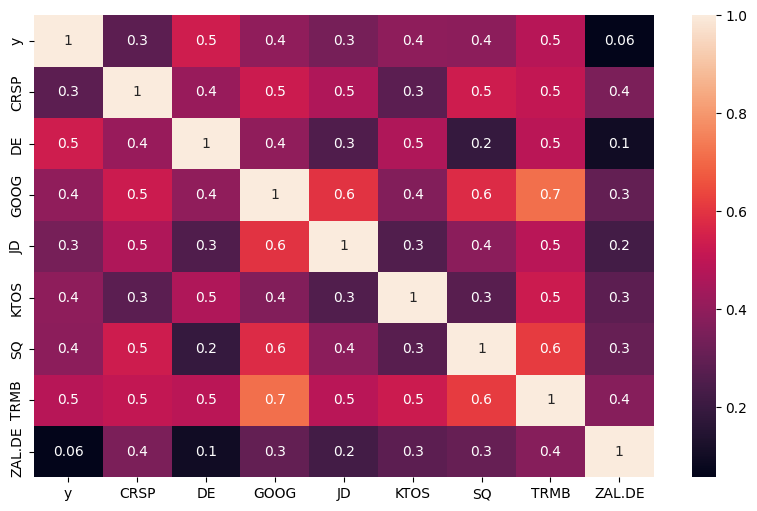

In [16]:
#Correlation Matrix
plt.figure(figsize = (10,6))
sns.heatmap(differencing.corr(),
            annot = True,
            fmt = '.1g')

In [17]:
data_final = data.drop(columns=["ZAL.DE"])
data_final.head()

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB
Date,,,,,,,,
2020-09-01,11970.478516,93.419998,210.029663,83.035500,79.267685,19.700001,166.660004,53.410000
2020-09-02,11414.034180,93.930000,209.470062,86.414001,79.959557,19.910000,162.880005,54.310001
2020-09-03,10245.296875,85.690002,203.391754,82.092003,75.952454,19.520000,152.860001,50.900002
2020-09-04,10511.813477,82.019997,203.903107,79.552002,76.874954,19.260000,146.389999,49.959999
2020-09-08,10131.516602,81.459999,202.841812,76.619499,73.242615,19.230000,139.110001,49.139999


In [18]:
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

In [19]:
impact = CausalImpact(data = data_final,
                      pre_period = pre_period,
                      post_period = post_period)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


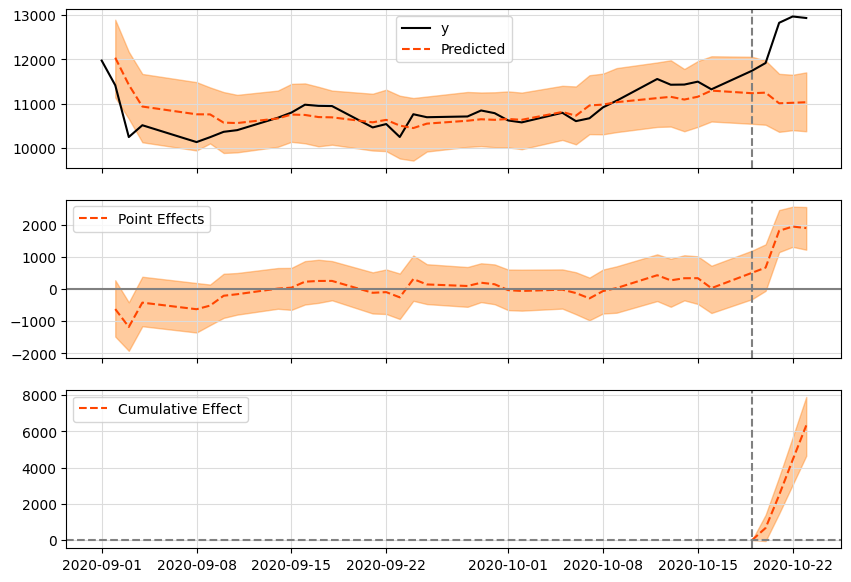

In [20]:
impact.plot()

In [22]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    12659.36           50637.45
Prediction (s.d.)         11075.74 (202.63)  44302.94 (810.54)
95% CI                    [10718.28, 11512.6][42873.13, 46050.39]

Absolute effect (s.d.)    1583.63 (202.63)   6334.51 (810.54)
95% CI                    [1146.77, 1941.08] [4587.06, 7764.32]

Relative effect (s.d.)    14.3% (1.83%)      14.3% (1.83%)
95% CI                    [10.35%, 17.53%]   [10.35%, 17.53%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [23]:
print(impact.summary("report"))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 12659.36. By contrast, in the absence of an
intervention, we would have expected an average response of 11075.74.
The 95% interval of this counterfactual prediction is [10718.28, 11512.6].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1583.63 with a 95% interval of
[1146.77, 1941.08]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 50637.45.
By contrast, had the intervention not taken place, we would have expected
a sum of 44302.94. The 95% interval of this prediction is [42873.13, 46050.39].


The above results are given in terms of absolute numbers. In relative
t